# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.sample(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16021,"MCBRIDE CLINIC ORTHOPEDIC HOSPITAL, L L C",370222,OK,READM-30-AMI-HRRP,Not Available,5.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
9971,ST JOSEPHS MERCY HEALTH CENTER INC,40026,AR,READM-30-HF-HRRP,689,NaN,0.9549,20.1,21.1,136.0,07/01/2010,06/30/2013
12979,CLIFTON SPRINGS HOSPITAL AND CLINIC,330265,NY,READM-30-HIP-KNEE-HRRP,Not Available,NaN,0.8702,4.5,5.2,NaN,07/01/2010,06/30/2013
14362,ADCARE HOSPITAL OF WORCESTER INC,220062,MA,READM-30-COPD-HRRP,Not Available,5.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
8447,SUTTER DAVIS HOSPITAL,50537,CA,READM-30-PN-HRRP,79,NaN,0.9766,17.0,17.4,12.0,07/01/2010,06/30/2013
15361,KAISER FOUNDATION HOSPITAL - SOUTH SAN FRANCISCO,50070,CA,READM-30-COPD-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
10009,FLORIDA HOSPITAL WESLEY CHAPEL,100319,FL,READM-30-PN-HRRP,Not Available,NaN,0.9543,15.1,15.9,NaN,07/01/2010,06/30/2013
12005,BUTLER MEMORIAL HOSPITAL,390168,PA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,0.9127,4.7,5.2,NaN,07/01/2010,06/30/2013
168,FOUNTAIN VALLEY REGIONAL HOSPITAL & MEDICAL CE...,50570,CA,READM-30-HIP-KNEE-HRRP,186,NaN,1.2471,7.0,5.6,17.0,07/01/2010,06/30/2013
700,WHITE PLAINS HOSPITAL CENTER,330304,NY,READM-30-PN-HRRP,786,NaN,1.1492,18.4,16.0,153.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.shape

(16860, 12)

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/vinhnguyen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


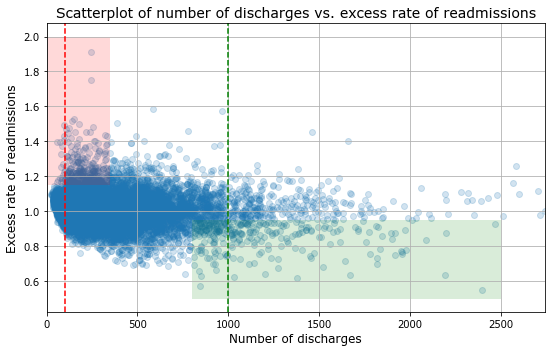

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.axvline(100,linestyle='--',color='r')
ax.axvline(1000,linestyle='--',color='g')

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Our Analysis

The preliminary report provides a very weak analysis, with little to no actual statistical analysis. Although no hypothesis testing is done here, the analysis assumes there is a significant difference between the mean excess admission rate of hospitals with number of discharges < 100 and hospitals with number of discharges > 1000. Looking at the scatter plot, it is very unclear if there is a significant difference and where the analysis even got their number from. It seems as if they took these numbers just by briefly looking at the data and estimating what they would be. This is a result of first not finding the relationship between excess readmission rate and number of discharges first. Therefore, we cannot agree with the preliminary assessment above. We need to do a much more thorough analysis.



In [7]:
clean_hospital_read_df.sample(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11078,TAMPA GENERAL HOSPITAL,100128,FL,READM-30-COPD-HRRP,276,NaN,0.9349,22.2,23.7,56.0,07/01/2010,06/30/2013
10445,BERGER HOSPITAL,360170,OH,READM-30-HF-HRRP,136,NaN,0.9471,25.3,26.7,31.0,07/01/2010,06/30/2013
10057,SPECTRUM HEALTH - BUTTERWORTH CAMPUS,230038,MI,READM-30-PN-HRRP,1120,NaN,0.9534,17.4,18.3,192.0,07/01/2010,06/30/2013
11331,IOWA LUTHERAN HOSPITAL,160024,IA,READM-30-COPD-HRRP,183,NaN,0.9296,15.3,16.5,23.0,07/01/2010,06/30/2013
2657,BARNES-JEWISH ST PETERS HOSPITAL,260191,MO,READM-30-COPD-HRRP,346,NaN,1.0686,23.1,21.6,85.0,07/01/2010,06/30/2013
5748,SOUTHERN REGIONAL MEDICAL CENTER,110165,GA,READM-30-PN-HRRP,169,NaN,1.0136,16.7,16.5,29.0,07/01/2010,06/30/2013
4959,MEMORIAL HOSPITAL OF RHODE ISLAND,410001,RI,READM-30-COPD-HRRP,217,NaN,1.0252,20.8,20.3,47.0,07/01/2010,06/30/2013
8206,BELLEVUE MEDICAL CENTER,280132,NE,READM-30-PN-HRRP,217,NaN,0.9795,16.2,16.6,34.0,07/01/2010,06/30/2013
4418,THE MEDICAL CENTER AT BOWLING GREEN,180013,KY,READM-30-PN-HRRP,818,NaN,1.0343,16.6,16.1,138.0,07/01/2010,06/30/2013
7981,CHRISTUS ST PATRICK HOSPITAL,190027,LA,READM-30-PN-HRRP,358,NaN,0.9824,17.9,18.2,63.0,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.isnull().sum().to_frame()

,0
Hospital Name,0
Provider Number,0
State,0
Measure Name,0
Number of Discharges,0
Footnote,11497
Excess Readmission Ratio,81
Predicted Readmission Rate,81
Expected Readmission Rate,81
Number of Readmissions,81


They did not even clean out all the null values for readmission variables!

In [9]:
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'], inplace=True)

In [10]:
clean_hospital_read_df.isnull().sum().to_frame()

,0
Hospital Name,0
Provider Number,0
State,0
Measure Name,0
Number of Discharges,0
Footnote,11497
Excess Readmission Ratio,0
Predicted Readmission Rate,0
Expected Readmission Rate,0
Number of Readmissions,0


### Hypothesis Testing

We will do a hypothesis test to test the significance between the mean excess readmissions ratio of hospitals with < 100 discharges and that of hospitals with > 1000 discharges. We will use a z test.

**Null Hypothesis**: u1 == u2

There is no significant difference.

**Alternative Hypothesis**: u1 != u2

There is a significant difference.

In [11]:
#small hospitals < 100
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
#large hosptials > 1000
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

err_small = small['Excess Readmission Ratio']
err_large = large['Excess Readmission Ratio']

In [12]:
#z test
from statsmodels.stats.weightstats import ztest
tstat, pval = ztest(err_small, err_large)
print("T stat: ", tstat)
print("P-value: ", pval)

T stat:  10.060620398500793
P-value:  8.247694433231281e-24


With p-value < 0.01, we reject the null hyptothesis. There is a significant difference between the mean excess readmissions ratio of hospitals with < 100 discharges and that of hospitals with > 1000 discharges. 

### Discussing statistical significance and practical significance.

This is an example where statistical significance does not lead to practical significance. Obviously there is going to be a statistical significance when comparing hospitals with < 100 discharges  with hospitals with > 1000 discharges. These are significantly different numbers of discharges. This analysis doesn't bring much insight into 

### What is the relationship between number of discharges and excess readmissions ratio?

In [13]:
print(clean_hospital_read_df['Number of Discharges'].describe())
print()
print(clean_hospital_read_df['Excess Readmission Ratio'].describe())

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64


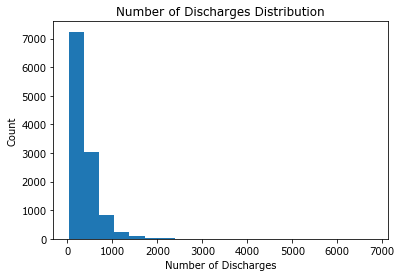

In [14]:
#histogram
plt.hist(clean_hospital_read_df['Number of Discharges'], bins=20)
plt.title('Number of Discharges Distribution')
plt.xlabel('Number of Discharges')
plt.ylabel('Count')
plt.show()

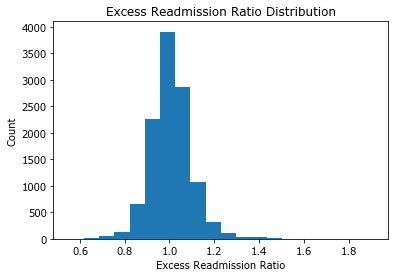

In [15]:
#histogram
plt.hist(clean_hospital_read_df['Excess Readmission Ratio'], bins=20)
plt.title('Excess Readmission Ratio Distribution')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Count')
plt.show()

Number of Discharges distribution is skewed right. Excess Readmission Ratio distribution is normal.

In [16]:
#pearson r
nod = clean_hospital_read_df['Number of Discharges']
err = clean_hospital_read_df['Excess Readmission Ratio']
pearson = stats.pearsonr(nod, err)
print('Correlation Coefficient, p-value: ', pearson)

Correlation Coefficient, p-value:  (-0.09739794351079353, 1.222547377680967e-25)


Receiving a correlation coefficient of -0.0984, there is a very slight nevative relationship between number of discharges and excess readmission ratio. But it is very close to 0. However, the very small p value indicates that there is a significant relationship here.

Slope:  -2.901051733057071e-05
Intercept:  1.0181061473733573


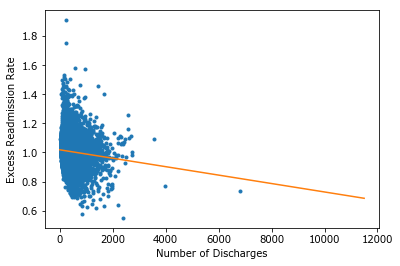

In [17]:
#linear regression
a, b = np.polyfit(nod, err, 1)

print('Slope: ', a)
print('Intercept: ', b)

#theoretical line
x1 = np.array([0,11497])
y1 = a * x1 + b

_ = plt.plot(nod, err, marker='.', linestyle='none')
_ = plt.plot(x1, y1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Rate')
plt.show()


Although it already seems like there is a slightly negative relationship between these two variables, we now have a numeric number.

For every patient a hospital discharges, the excess readmission rate goes down by 2.901e-05. This is a very small number, and looking at the graph the variance is obviously very high. So practically, this doesn't tell us too much more about the relationship.
